In [4]:
import os
import pandas as pd

# Path to the folder containing all the company CSV files
folder_path = "/Users/udaysinghshekhawat/Documents/NIFTY500_dataset/Dataset"

# List to store individual company DataFrames
dataframes = []

# Loop through each file in the folder
for file_name in os.listdir(folder_path):
    if file_name.endswith(".csv"):  # Process only CSV files
        file_path = os.path.join(folder_path, file_name)
        company_df = pd.read_csv(file_path)  # Read each file
        company_df['Company'] = file_name.split('.')[0]  # Add a column for the company name
        dataframes.append(company_df)  # Append to the list

# Combine all the individual DataFrames into one
nifty500_df = pd.concat(dataframes, ignore_index=True)

# Save the combined dataset (optional)
nifty500_df.to_csv("nifty500_combined.csv", index=False)

# Display basic information about the combined dataset
print("Combined Dataset Shape:", nifty500_df.shape)
print("Columns in the Dataset:")
print(nifty500_df.columns)
print("First 5 Rows:")
print(nifty500_df.head())


/var/folders/wp/l1lbtpb57rl387801fcn64ch0000gn/T/ipykernel_10848/3119564342.py:19: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  nifty500_df = pd.concat(dataframes, ignore_index=True)


Combined Dataset Shape: (1047985, 8)
Columns in the Dataset:
Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'Company'],
      dtype='object')
First 5 Rows:
         Date        Open        High         Low       Close   Adj Close  \
0  2012-01-02  164.050003  164.050003  157.149994  162.149994  153.787064   
1  2012-01-03  162.949997  171.500000  162.949997  169.350006  160.615707   
2  2012-01-04  170.050003  170.050003  164.000000  165.550003  157.011719   
3  2012-01-05  164.550003  167.449997  163.100006  164.350006  155.873596   
4  2012-01-06  162.750000  167.949997  160.899994  162.750000  154.356110   

     Volume    Company  
0  100575.0  419_GET_D  
1  123325.0  419_GET_D  
2   82339.0  419_GET_D  
3   90478.0  419_GET_D  
4  144783.0  419_GET_D  


In [6]:
# Check for missing values
print("Missing Values Count:")
print(nifty500_df.isnull().sum())

# Drop rows with missing values (or fill them, depending on context)
nifty500_df = nifty500_df.dropna()

# Check for duplicates
print("Number of Duplicate Rows:", nifty500_df.duplicated().sum())
nifty500_df = nifty500_df.drop_duplicates()

# Convert 'Date' column to datetime format
nifty500_df['Date'] = pd.to_datetime(nifty500_df['Date'], errors='coerce')

# Check for invalid dates
print("Invalid Dates:", nifty500_df['Date'].isnull().sum())
nifty500_df = nifty500_df.dropna(subset=['Date'])

# Ensure numeric columns are correctly typed
numeric_columns = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
nifty500_df[numeric_columns] = nifty500_df[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Drop rows with invalid numeric data
nifty500_df = nifty500_df.dropna()

# Check for any anomalies in ranges (e.g., negative values)
print("Describe Numeric Columns:")
print(nifty500_df[numeric_columns].describe())

# Ensure volume and prices are non-negative
nifty500_df = nifty500_df[(nifty500_df['Volume'] >= 0) & 
                          (nifty500_df[['Open', 'High', 'Low', 'Close', 'Adj Close']].min(axis=1) >= 0)]

print("Cleaned Dataset Shape:", nifty500_df.shape)


Missing Values Count:
Date         0
Open         3
High         3
Low          3
Close        3
Adj Close    3
Volume       3
Company      0
dtype: int64
Number of Duplicate Rows: 0
Invalid Dates: 0
Describe Numeric Columns:
               Open          High           Low         Close     Adj Close  \
count  1.047982e+06  1.047982e+06  1.047982e+06  1.047982e+06  1.047982e+06   
mean   9.282570e+02  9.425078e+02  9.134057e+02  9.269940e+02  8.911390e+02   
std    3.319631e+03  3.361666e+03  3.273598e+03  3.314397e+03  3.281045e+03   
min    6.550000e-01  6.850000e-01  6.000000e-01  6.700000e-01  3.234233e-01   
25%    1.100500e+02  1.124500e+02  1.080000e+02  1.100000e+02  9.869390e+01   
50%    2.786667e+02  2.838000e+02  2.732000e+02  2.781000e+02  2.604360e+02   
75%    7.140000e+02  7.251375e+02  7.020000e+02  7.129500e+02  6.782300e+02   
max    9.677000e+04  9.859995e+04  9.275000e+04  9.697385e+04  9.690265e+04   

             Volume  
count  1.047982e+06  
mean   2.456987e+0

Number of Companies in the Dataset: 487
Company-Wise Summary Statistics:
                       Open                                  High              \
                       mean         min          max         mean         min   
Company                                                                         
000_RELIANCE     927.685999  334.330872  2742.750000   938.232627  338.194244   
001_TCS         1589.581114  532.625000  3930.000000  1606.389277  537.150024   
002_HINDUNILVR  1248.534727  377.149994  2827.899902  1261.281581  382.899994   
003_HDFCBANK     774.626217  214.449997  1705.000000   781.755010  214.899994   
004_HDFC        1461.284932  624.299988  3004.000000  1475.337283  637.500000   

                                     Low                           \
                        max         mean         min          max   
Company                                                             
000_RELIANCE    2751.350098   916.308288  333.365021  2708.000000   
00

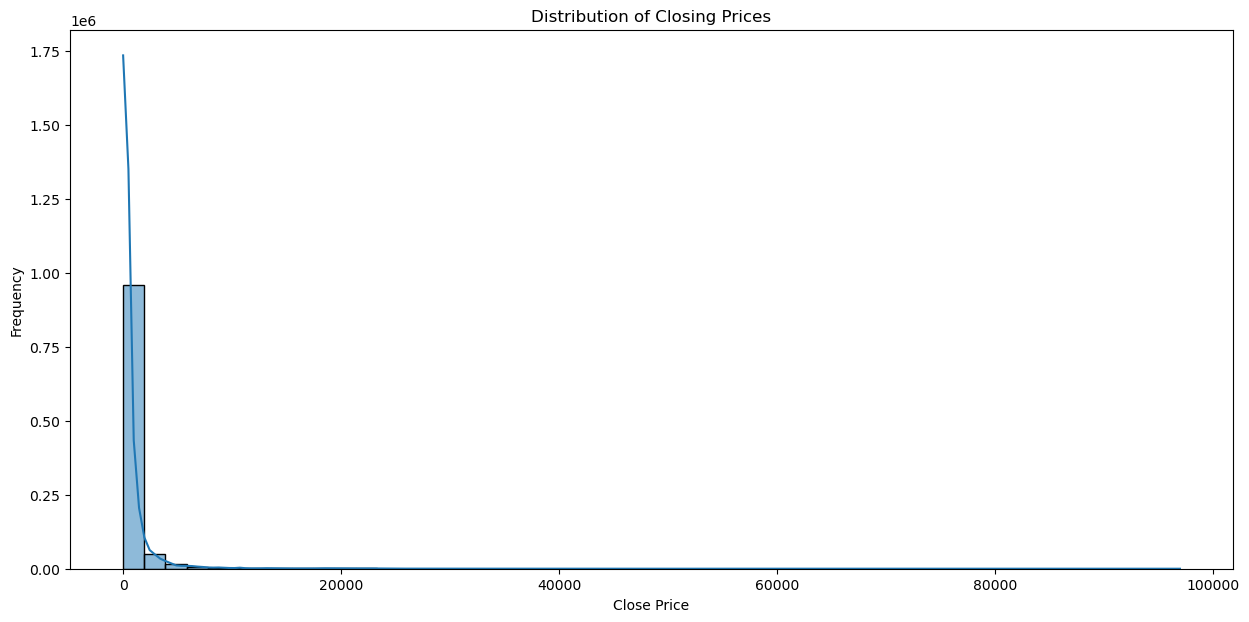

In [7]:
# Check the number of unique companies
print("Number of Companies in the Dataset:", nifty500_df['Company'].nunique())

# Group data by company and inspect summary statistics
company_summary = nifty500_df.groupby('Company').agg({
    'Open': ['mean', 'min', 'max'],
    'High': ['mean', 'min', 'max'],
    'Low': ['mean', 'min', 'max'],
    'Close': ['mean', 'min', 'max'],
    'Volume': ['mean', 'sum']
})
print("Company-Wise Summary Statistics:")
print(company_summary.head())

# Visualize the distribution of closing prices
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 7))
sns.histplot(nifty500_df['Close'], bins=50, kde=True)
plt.title("Distribution of Closing Prices")
plt.xlabel("Close Price")
plt.ylabel("Frequency")
plt.show()


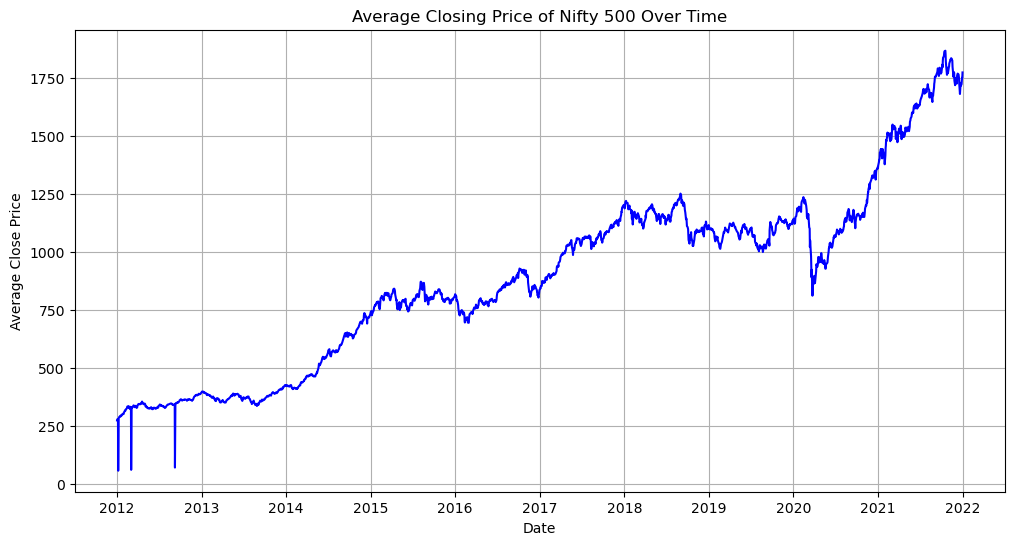

In [10]:
# Convert 'Date' to datetime if not already done
nifty500_df['Date'] = pd.to_datetime(nifty500_df['Date'], errors='coerce')

# Group by 'Date' and compute the mean of 'Close' across all companies
daily_avg_close = nifty500_df.groupby('Date')['Close'].mean()

# Plot the daily average close price for the Nifty 500
plt.figure(figsize=(12, 6))
plt.plot(daily_avg_close, color='blue')
plt.title("Average Closing Price of Nifty 500 Over Time")
plt.xlabel("Date")
plt.ylabel("Average Close Price")
plt.grid(True)
plt.show()


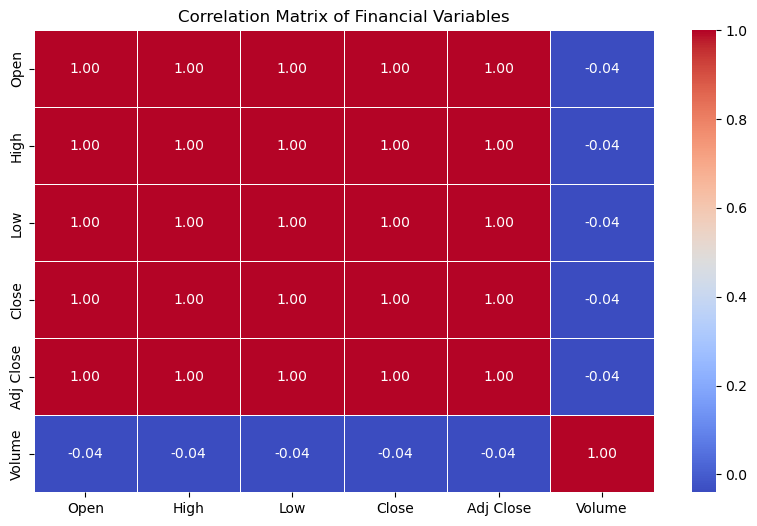

In [12]:
# Select relevant numeric columns for correlation analysis
correlation_matrix = nifty500_df[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']].corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Financial Variables")
plt.show()


In [14]:
# Feature 1: Price Range (High - Low)
nifty500_df['Price Range'] = nifty500_df['High'] - nifty500_df['Low']

# Feature 2: Price Change (Change in Close Price)
nifty500_df['Price Change'] = nifty500_df['Close'].diff()

# Display the first few rows to check the new features
print(nifty500_df[['Date', 'Company', 'Price Range', 'Price Change']].head())


        Date    Company  Price Range  Price Change
0 2012-01-02  419_GET_D     6.900009           NaN
1 2012-01-03  419_GET_D     8.550003      7.200012
2 2012-01-04  419_GET_D     6.050003     -3.800003
3 2012-01-05  419_GET_D     4.349991     -1.199997
4 2012-01-06  419_GET_D     7.050003     -1.600006


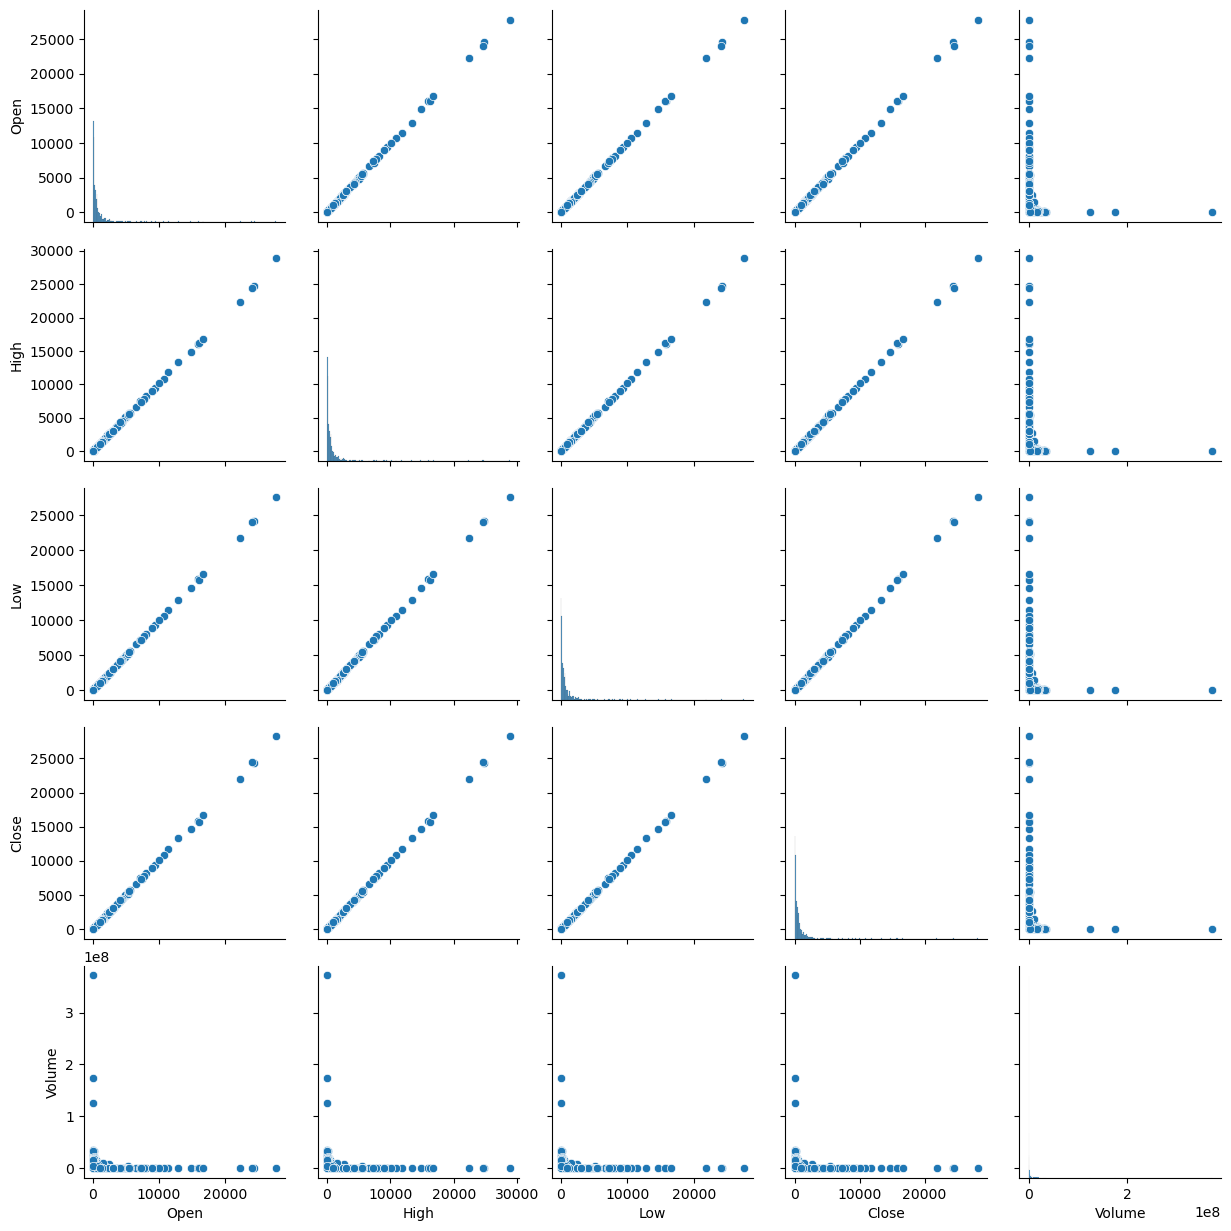

In [16]:
# Select a subset of the columns for pair plotting
subset_columns = ['Open', 'High', 'Low', 'Close', 'Volume']

# Create a pair plot to visualize relationships
sns.pairplot(nifty500_df[subset_columns].sample(1000))  # Sampling to avoid large dataset issues
plt.show()


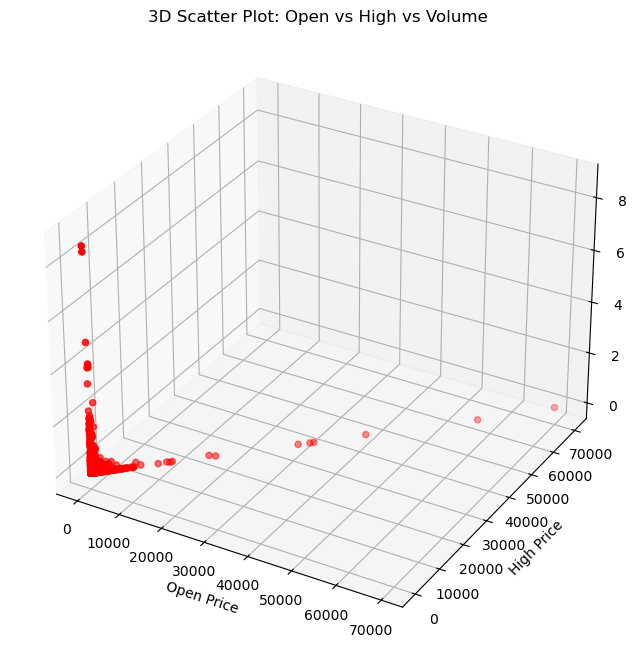

In [17]:
from mpl_toolkits.mplot3d import Axes3D

# Sample the data for a 3D scatter plot
sample_df = nifty500_df.sample(1000)

# Create a 3D scatter plot of Open, High, and Volume
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(sample_df['Open'], sample_df['High'], sample_df['Volume'], c='r', marker='o')

ax.set_xlabel('Open Price')
ax.set_ylabel('High Price')
ax.set_zlabel('Volume')

plt.title('3D Scatter Plot: Open vs High vs Volume')
plt.show()


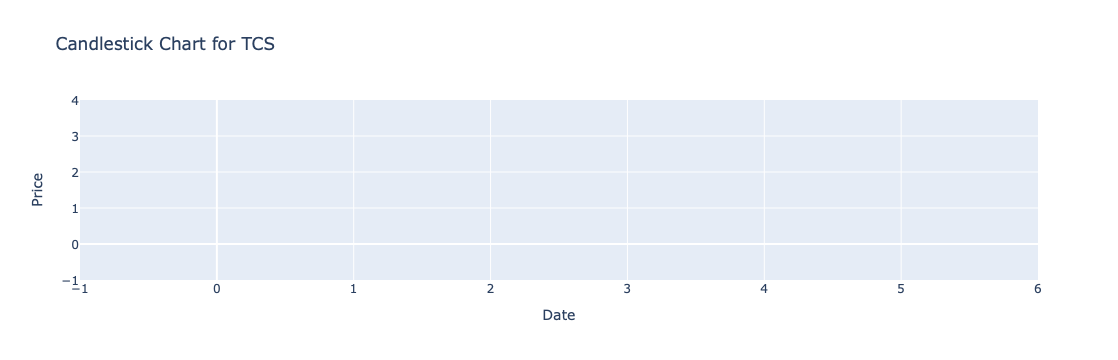

In [20]:
import plotly.graph_objects as go

# Filter data for a specific company (e.g., TCS)
company_df = nifty500_df[nifty500_df['Company'] == 'TCS']

# Prepare data for candlestick chart
fig = go.Figure(data=[go.Candlestick(
    x=company_df['Date'],
    open=company_df['Open'],
    high=company_df['High'],
    low=company_df['Low'],
    close=company_df['Close'],
    name='TCS'
)])

# Add titles and labels
fig.update_layout(
    title='Candlestick Chart for TCS',
    xaxis_title='Date',
    yaxis_title='Price',
    xaxis_rangeslider_visible=False  # Hide the range slider
)

fig.show()


In [22]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [24]:
# Calculate IQR to detect outliers in the Closing prices
Q1 = nifty500_df['Close'].quantile(0.25)
Q3 = nifty500_df['Close'].quantile(0.75)
IQR = Q3 - Q1

# Define the outlier range
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out rows with outliers
outliers_df = nifty500_df[(nifty500_df['Close'] < lower_bound) | (nifty500_df['Close'] > upper_bound)]

# Display outliers
print(outliers_df[['Date', 'Company', 'Close']])


              Date         Company        Close
8955    2014-09-12  331_SUNCLAYLTD  1625.150024
8956    2014-09-15  331_SUNCLAYLTD  1641.000000
8959    2014-09-18  331_SUNCLAYLTD  1643.599976
8960    2014-09-19  331_SUNCLAYLTD  1654.800049
8961    2014-09-22  331_SUNCLAYLTD  1651.849976
...            ...             ...          ...
1047980 2021-12-27  103_BAJAJHLDNG  5083.200195
1047981 2021-12-28  103_BAJAJHLDNG  5091.149902
1047982 2021-12-29  103_BAJAJHLDNG  5032.549805
1047983 2021-12-30  103_BAJAJHLDNG  5158.950195
1047984 2021-12-31  103_BAJAJHLDNG  5432.049805

[110400 rows x 3 columns]


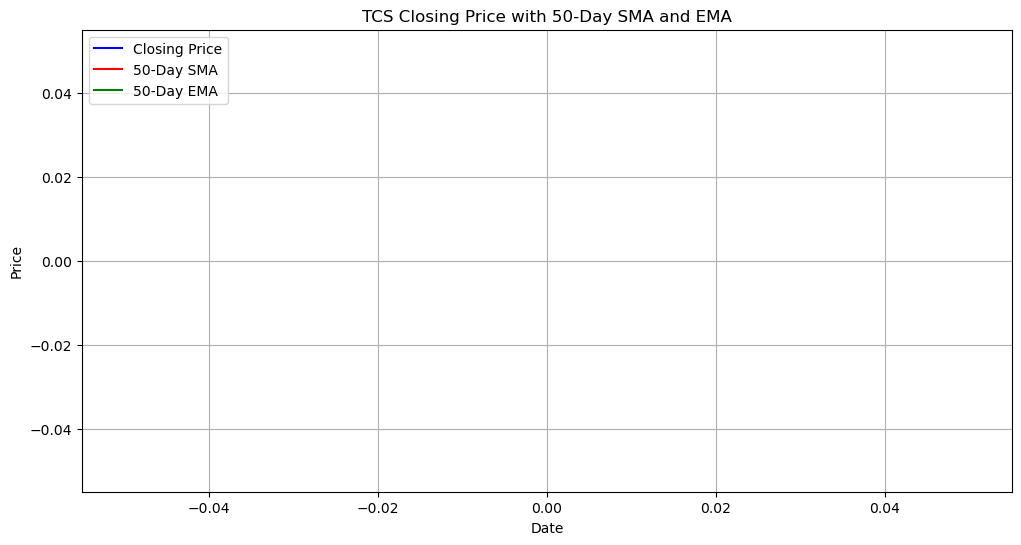

In [26]:
# Calculate Simple Moving Average (SMA) and Exponential Moving Average (EMA)
company_df['SMA_50'] = company_df['Close'].rolling(window=50).mean()  # 50-day SMA
company_df['EMA_50'] = company_df['Close'].ewm(span=50, adjust=False).mean()  # 50-day EMA

# Plot Closing Price with SMA and EMA
plt.figure(figsize=(12, 6))
plt.plot(company_df['Close'], label='Closing Price', color='blue')
plt.plot(company_df['SMA_50'], label='50-Day SMA', color='red')
plt.plot(company_df['EMA_50'], label='50-Day EMA', color='green')

plt.title('TCS Closing Price with 50-Day SMA and EMA')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()


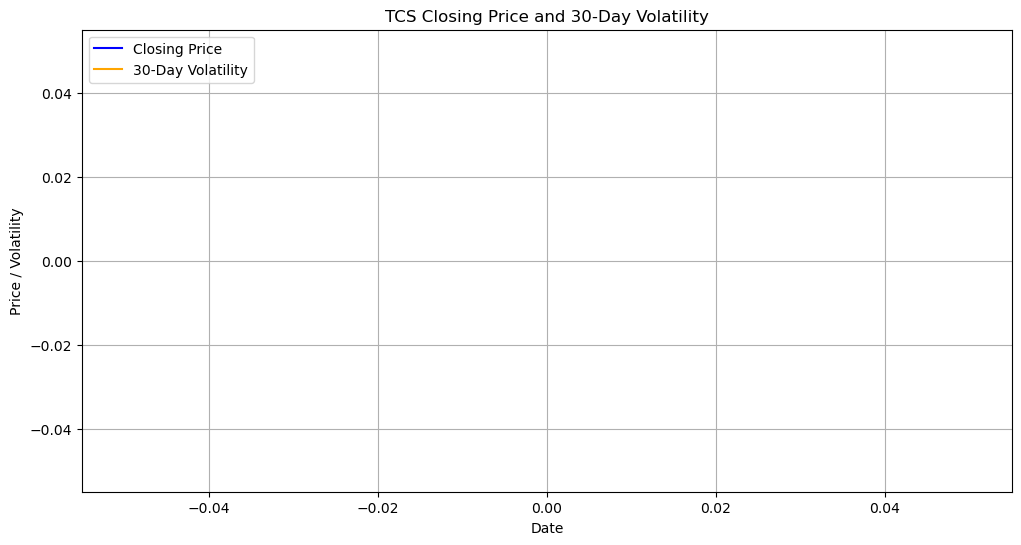

In [28]:
# Calculate rolling standard deviation (volatility) for 30 days
company_df['Volatility_30'] = company_df['Close'].rolling(window=30).std()

# Plot Closing Price and Volatility
plt.figure(figsize=(12, 6))
plt.plot(company_df['Close'], label='Closing Price', color='blue')
plt.plot(company_df['Volatility_30'], label='30-Day Volatility', color='orange')

plt.title('TCS Closing Price and 30-Day Volatility')
plt.xlabel('Date')
plt.ylabel('Price / Volatility')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()


In [30]:
company_df = nifty500_df[nifty500_df['Company'] == 'TCS']
print(f"Number of observations for TCS: {len(company_df)}")


Number of observations for TCS: 0


In [32]:
# Check for missing values
missing_data = nifty500_df.isnull().sum()
print(missing_data)

# Handling missing values - Let's fill missing values with forward fill method for time series data
nifty500_df = nifty500_df.fillna(method='ffill')



Date            0
Open            0
High            0
Low             0
Close           0
Adj Close       0
Volume          0
Company         0
Price Range     0
Price Change    1
dtype: int64


/var/folders/wp/l1lbtpb57rl387801fcn64ch0000gn/T/ipykernel_10848/38637391.py:6: FutureWarning:

DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.



In [34]:
# Convert the 'Date' column to datetime format
nifty500_df['Date'] = pd.to_datetime(nifty500_df['Date'])

# Extract year, month, and day of the week
nifty500_df['Year'] = nifty500_df['Date'].dt.year
nifty500_df['Month'] = nifty500_df['Date'].dt.month
nifty500_df['DayOfWeek'] = nifty500_df['Date'].dt.dayofweek

# Let's see the first few rows with the new features
print(nifty500_df.head())


        Date        Open        High         Low       Close   Adj Close  \
0 2012-01-02  164.050003  164.050003  157.149994  162.149994  153.787064   
1 2012-01-03  162.949997  171.500000  162.949997  169.350006  160.615707   
2 2012-01-04  170.050003  170.050003  164.000000  165.550003  157.011719   
3 2012-01-05  164.550003  167.449997  163.100006  164.350006  155.873596   
4 2012-01-06  162.750000  167.949997  160.899994  162.750000  154.356110   

     Volume    Company  Price Range  Price Change  Year  Month  DayOfWeek  
0  100575.0  419_GET_D     6.900009           NaN  2012      1          0  
1  123325.0  419_GET_D     8.550003      7.200012  2012      1          1  
2   82339.0  419_GET_D     6.050003     -3.800003  2012      1          2  
3   90478.0  419_GET_D     4.349991     -1.199997  2012      1          3  
4  144783.0  419_GET_D     7.050003     -1.600006  2012      1          4  


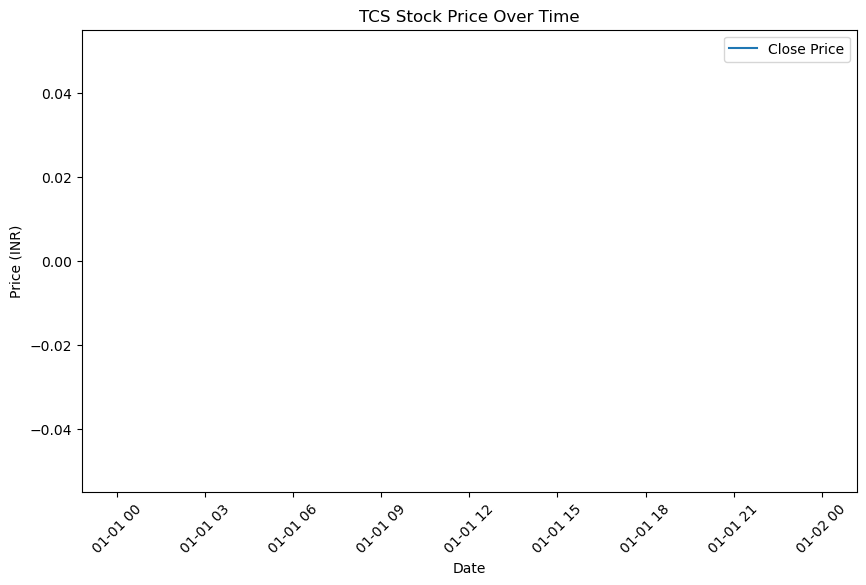

In [36]:
import matplotlib.pyplot as plt

# Filter data for a specific company, e.g., TCS
company_df = nifty500_df[nifty500_df['Company'] == 'TCS']

# Plot the 'Close' price over time
plt.figure(figsize=(10,6))
plt.plot(company_df['Date'], company_df['Close'], label='Close Price')
plt.title('TCS Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price (INR)')
plt.legend()
plt.xticks(rotation=45)
plt.show()


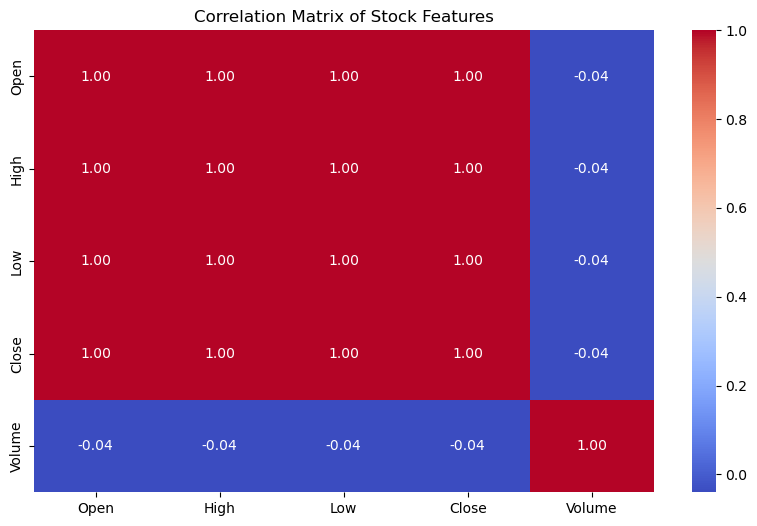

In [38]:
import seaborn as sns

# Calculate correlation matrix
correlation_matrix = nifty500_df[['Open', 'High', 'Low', 'Close', 'Volume']].corr()

# Plot the heatmap
plt.figure(figsize=(10,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Stock Features')
plt.show()


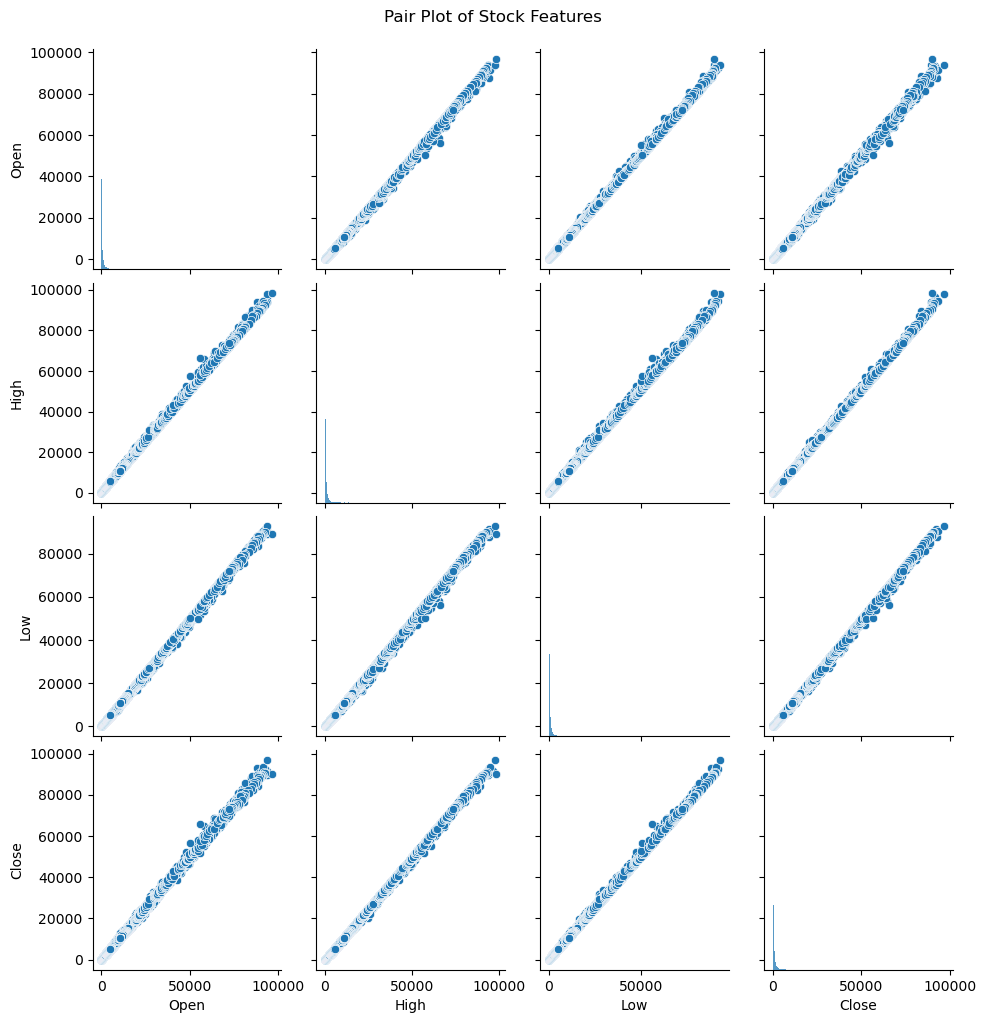

In [40]:
# Pair plot of a subset of the dataset (e.g., Open, High, Low, Close)
sns.pairplot(nifty500_df[['Open', 'High', 'Low', 'Close']])
plt.suptitle('Pair Plot of Stock Features', y=1.02)
plt.show()


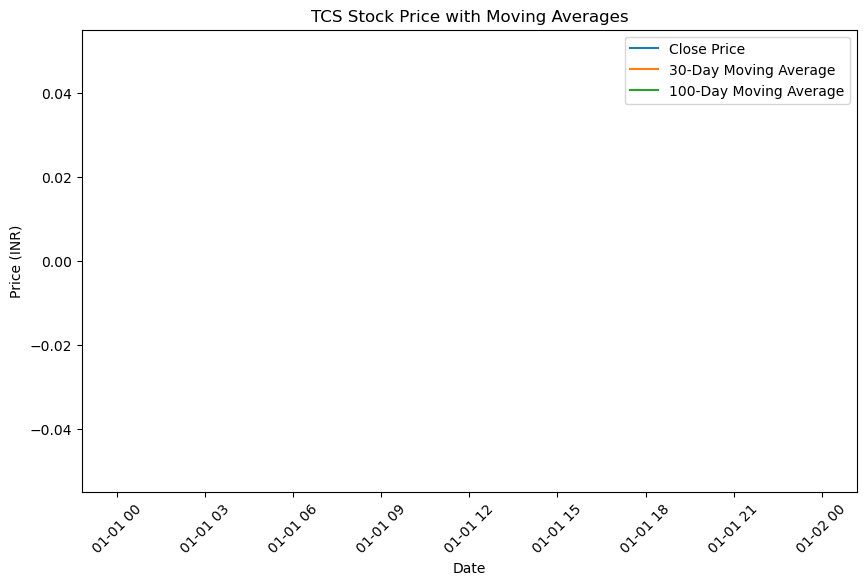

In [41]:
# Compute moving averages (e.g., 30-day and 100-day moving averages)
company_df['30_day_MA'] = company_df['Close'].rolling(window=30).mean()
company_df['100_day_MA'] = company_df['Close'].rolling(window=100).mean()

# Plot the closing price and moving averages
plt.figure(figsize=(10,6))
plt.plot(company_df['Date'], company_df['Close'], label='Close Price')
plt.plot(company_df['Date'], company_df['30_day_MA'], label='30-Day Moving Average')
plt.plot(company_df['Date'], company_df['100_day_MA'], label='100-Day Moving Average')
plt.title('TCS Stock Price with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price (INR)')
plt.legend()
plt.xticks(rotation=45)
plt.show()


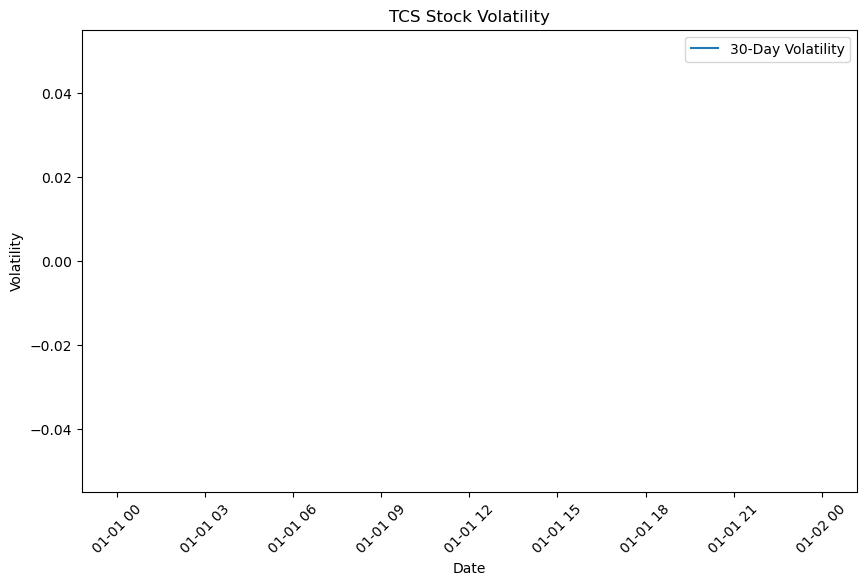

In [42]:
# Compute rolling volatility (standard deviation over a 30-day window)
company_df['30_day_volatility'] = company_df['Close'].rolling(window=30).std()

# Plot the volatility
plt.figure(figsize=(10,6))
plt.plot(company_df['Date'], company_df['30_day_volatility'], label='30-Day Volatility')
plt.title('TCS Stock Volatility')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.xticks(rotation=45)
plt.show()


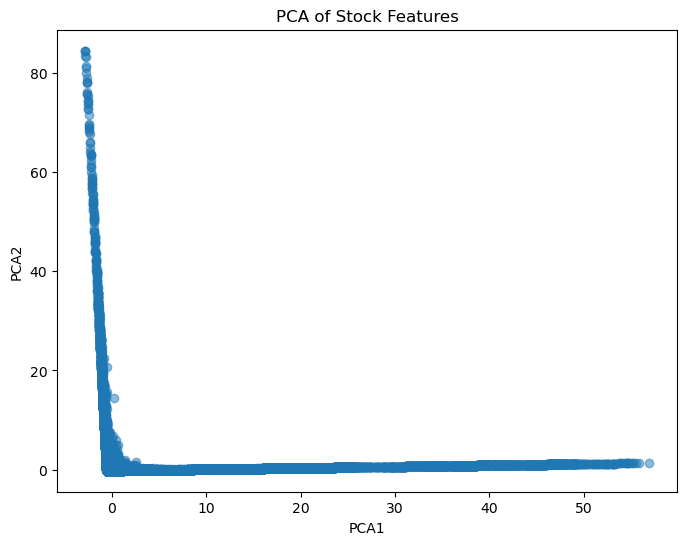

In [43]:
from sklearn.decomposition import PCA

# Select relevant columns for PCA
pca_data = nifty500_df[['Open', 'High', 'Low', 'Close', 'Volume']]

# Standardize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(pca_data)

# Apply PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

# Create a DataFrame with the PCA result
pca_df = pd.DataFrame(pca_result, columns=['PCA1', 'PCA2'])

# Plot the PCA result
plt.figure(figsize=(8,6))
plt.scatter(pca_df['PCA1'], pca_df['PCA2'], alpha=0.5)
plt.title('PCA of Stock Features')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()


In [57]:
# Convert 'Date' column to datetime format
nifty500_df['Date'] = pd.to_datetime(nifty500_df['Date'])


In [59]:
# Drop duplicates based on 'Date' and 'Company'
nifty500_df.drop_duplicates(subset=['Date', 'Company'], inplace=True)


In [61]:
# Extract year and month from 'Date' column
nifty500_df['Year'] = nifty500_df['Date'].dt.year
nifty500_df['Month'] = nifty500_df['Date'].dt.month


In [63]:
# Calculate daily returns
nifty500_df['Daily_Return'] = nifty500_df.groupby('Company')['Close'].pct_change()


In [65]:
# 30-day moving average for stock prices
nifty500_df['30_Day_MA'] = nifty500_df.groupby('Company')['Close'].rolling(window=30).mean().reset_index(level=0, drop=True)


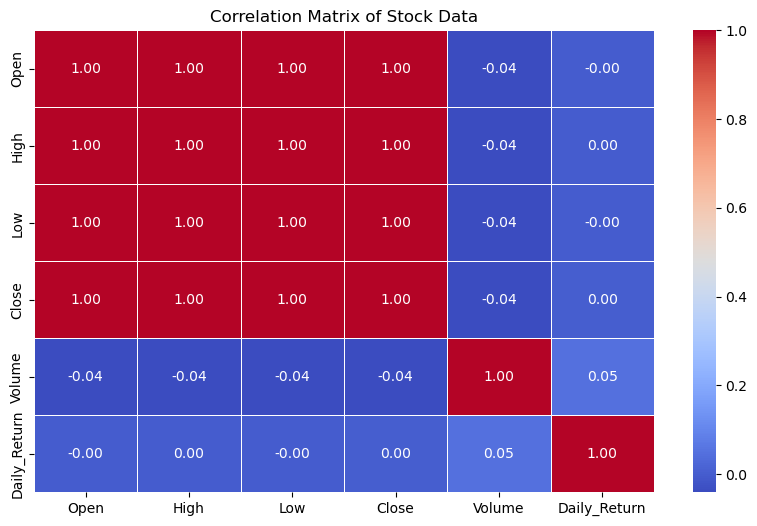

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
correlation_matrix = nifty500_df[['Open', 'High', 'Low', 'Close', 'Volume', 'Daily_Return']].corr()

# Plot the correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Stock Data')
plt.show()


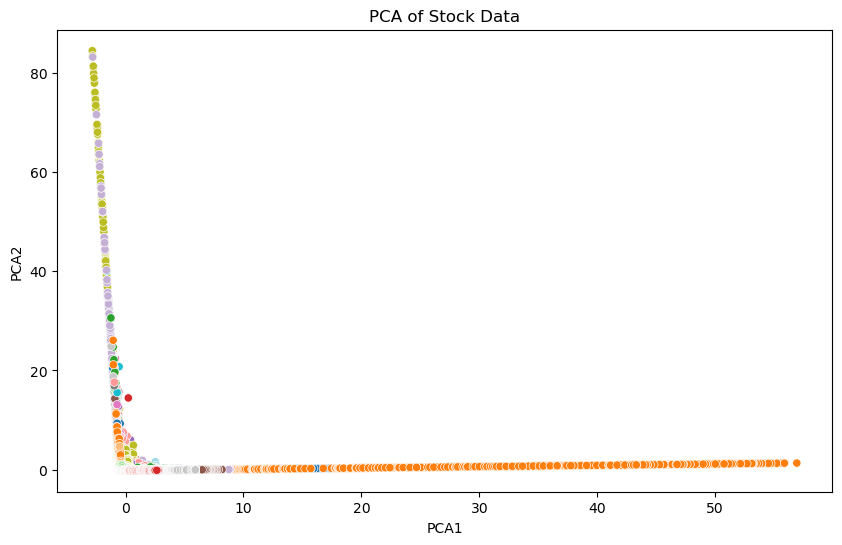

In [69]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize the data (important for PCA)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(nifty500_df[['Open', 'High', 'Low', 'Close', 'Volume']])

# Apply PCA
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_data)

# Create a DataFrame with PCA components
nifty500_df['PCA1'] = pca_components[:, 0]
nifty500_df['PCA2'] = pca_components[:, 1]

# Plot PCA components
plt.figure(figsize=(10,6))
sns.scatterplot(x='PCA1', y='PCA2', data=nifty500_df, hue='Company', palette='tab20', legend=None)
plt.title('PCA of Stock Data')
plt.show()


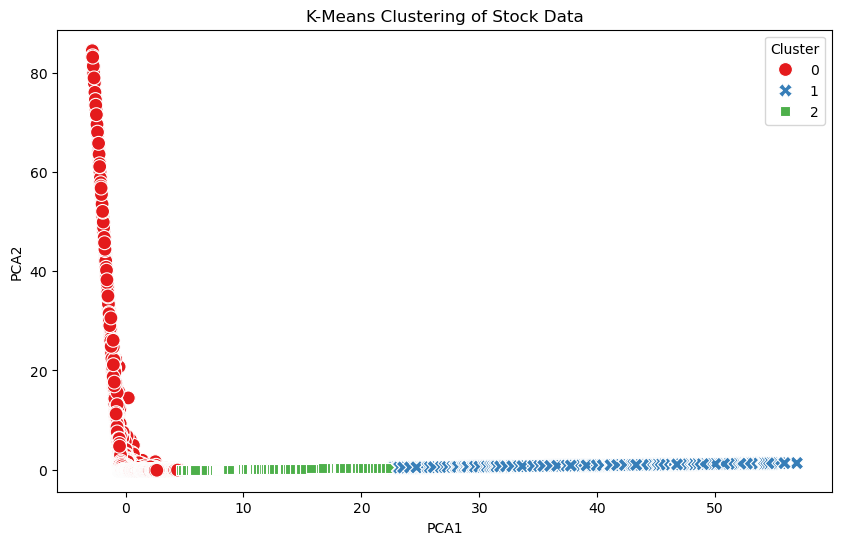

In [71]:
from sklearn.cluster import KMeans

# Use PCA components for clustering
kmeans = KMeans(n_clusters=3, random_state=42)
nifty500_df['Cluster'] = kmeans.fit_predict(nifty500_df[['PCA1', 'PCA2']])

# Plot the clusters
plt.figure(figsize=(10,6))
sns.scatterplot(x='PCA1', y='PCA2', data=nifty500_df, hue='Cluster', palette='Set1', style='Cluster', s=100)
plt.title('K-Means Clustering of Stock Data')
plt.show()


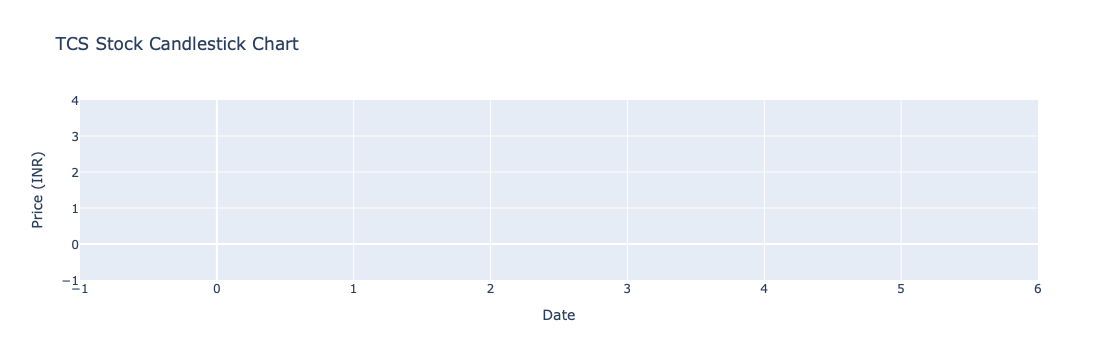

In [73]:
import plotly.graph_objects as go

# Select data for a specific company (e.g., TCS)
company_df = nifty500_df[nifty500_df['Company'] == 'TCS']

# Create the candlestick chart
fig = go.Figure(data=[go.Candlestick(x=company_df['Date'],
                                     open=company_df['Open'],
                                     high=company_df['High'],
                                     low=company_df['Low'],
                                     close=company_df['Close'])])

# Customize the chart
fig.update_layout(title='TCS Stock Candlestick Chart',
                  xaxis_title='Date',
                  yaxis_title='Price (INR)',
                  xaxis_rangeslider_visible=False)
fig.show()


/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning:

Creating legend with loc="best" can be slow with large amounts of data.



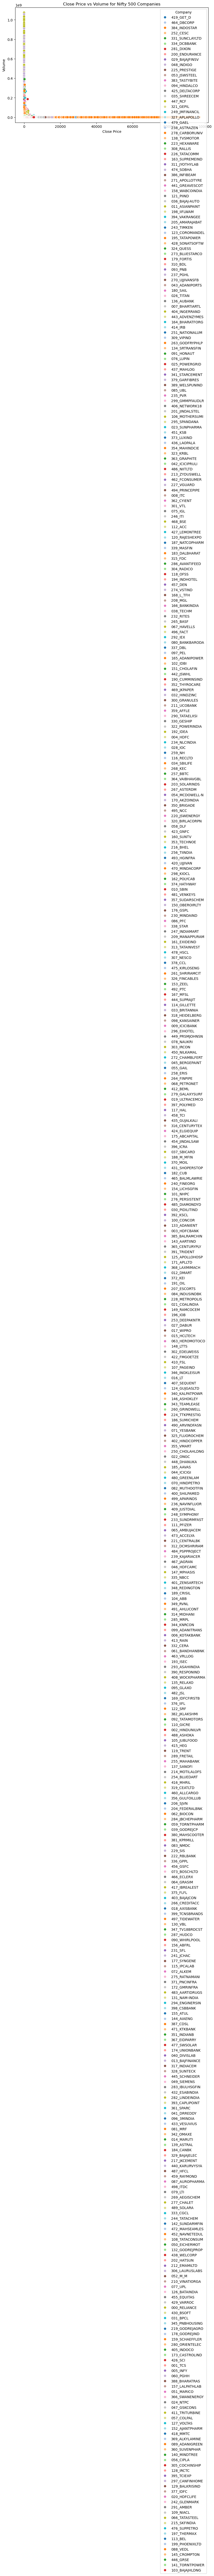

In [75]:
# Scatter plot for 'Close' vs 'Volume'
plt.figure(figsize=(10,6))
sns.scatterplot(x='Close', y='Volume', data=nifty500_df, hue='Company', palette='tab20', s=50)
plt.title('Close Price vs Volume for Nifty 500 Companies')
plt.xlabel('Close Price')
plt.ylabel('Volume')
plt.show()


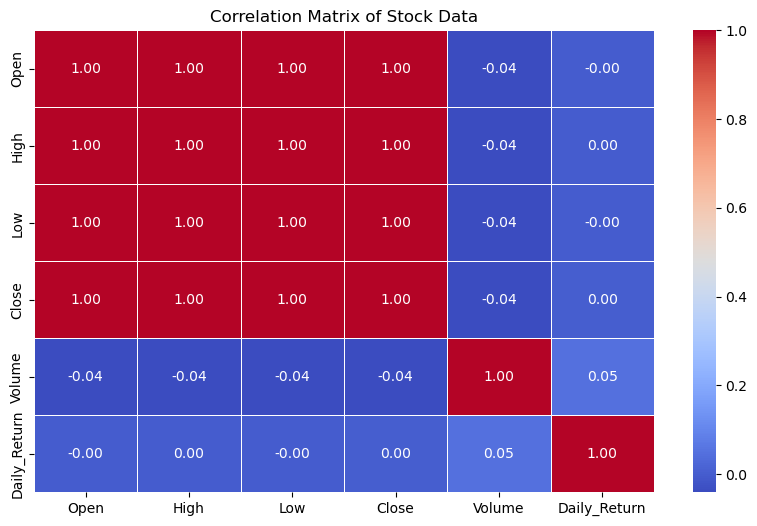

In [77]:
# Compute correlation matrix
correlation_matrix = nifty500_df[['Open', 'High', 'Low', 'Close', 'Volume', 'Daily_Return']].corr()

# Plot the correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Stock Data')
plt.show()


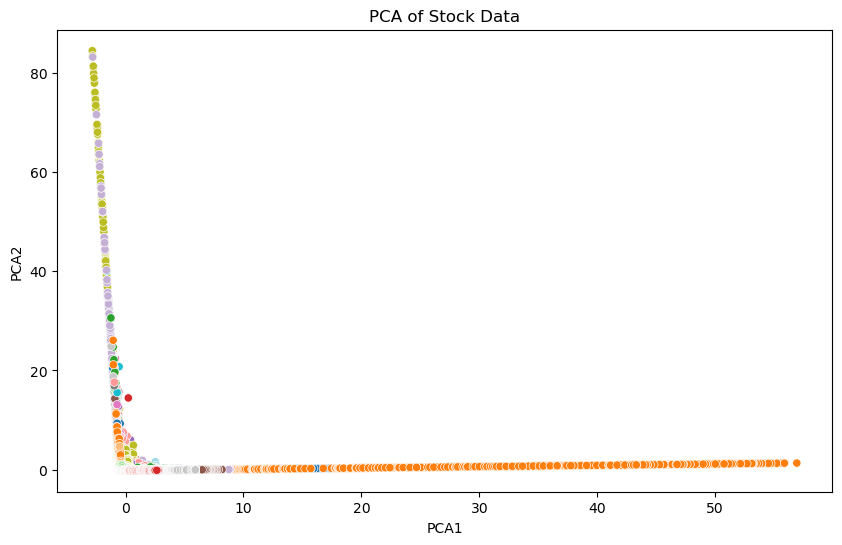

In [79]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize the data (important for PCA)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(nifty500_df[['Open', 'High', 'Low', 'Close', 'Volume']])

# Apply PCA
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_data)

# Create a DataFrame with PCA components
nifty500_df['PCA1'] = pca_components[:, 0]
nifty500_df['PCA2'] = pca_components[:, 1]

# Plot PCA components
plt.figure(figsize=(10,6))
sns.scatterplot(x='PCA1', y='PCA2', data=nifty500_df, hue='Company', palette='tab20', legend=None)
plt.title('PCA of Stock Data')
plt.show()


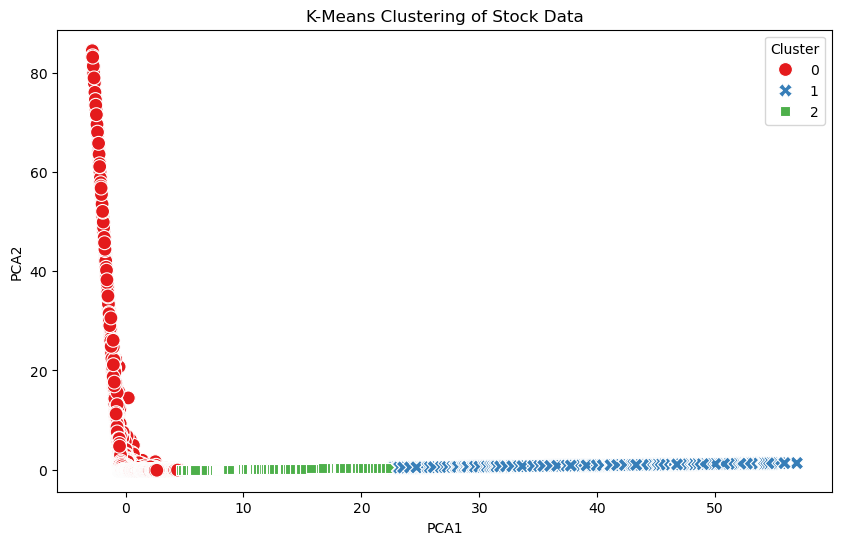

In [81]:
from sklearn.cluster import KMeans

# Apply KMeans clustering on PCA components
kmeans = KMeans(n_clusters=3, random_state=42)
nifty500_df['Cluster'] = kmeans.fit_predict(nifty500_df[['PCA1', 'PCA2']])

# Plot the clusters
plt.figure(figsize=(10,6))
sns.scatterplot(x='PCA1', y='PCA2', data=nifty500_df, hue='Cluster', palette='Set1', style='Cluster', s=100)
plt.title('K-Means Clustering of Stock Data')
plt.show()


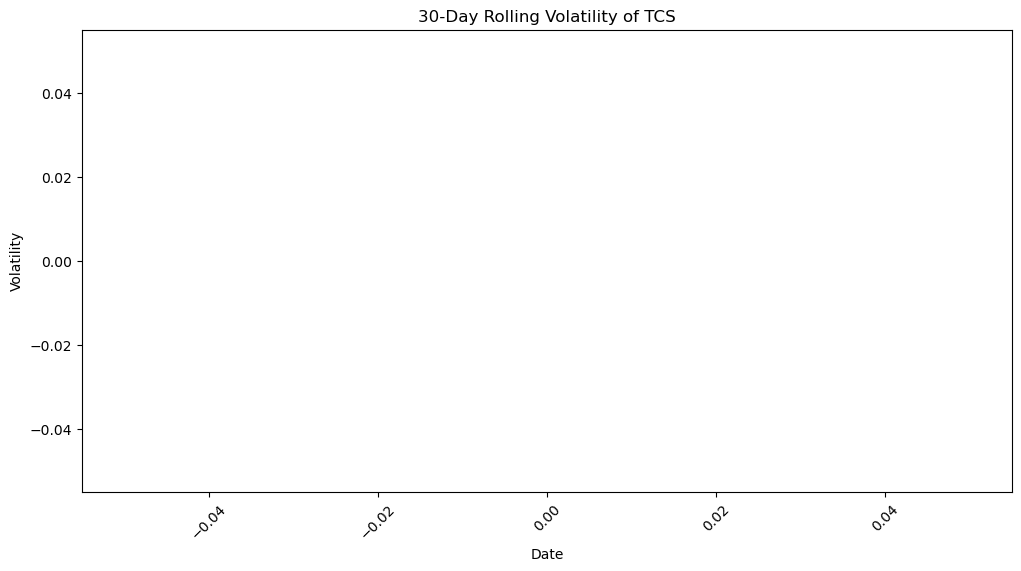

In [83]:
# Calculate rolling volatility (standard deviation of returns over a 30-day window)
nifty500_df['30_Day_Volatility'] = nifty500_df.groupby('Company')['Daily_Return'].rolling(window=30).std().reset_index(level=0, drop=True)

# Plot volatility over time for a particular company
company_df = nifty500_df[nifty500_df['Company'] == 'TCS']
plt.figure(figsize=(12,6))
sns.lineplot(x='Date', y='30_Day_Volatility', data=company_df, color='red')
plt.title('30-Day Rolling Volatility of TCS')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.xticks(rotation=45)
plt.show()


In [85]:
# Assuming we have a 'Sector' column in the dataset
sector_performance = nifty500_df.groupby('Sector')['Close'].mean()

# Plot sector performance
plt.figure(figsize=(12,6))
sector_performance.plot(kind='bar', color='skyblue')
plt.title('Average Sector Performance')
plt.xlabel('Sector')
plt.ylabel('Average Close Price')
plt.xticks(rotation=90)
plt.show()


KeyError: 'Sector'